In [ ]:
import requests
from bs4 import BeautifulSoup

URL = 'https://minfin.com.ua/cards/'
# в Python как таковых констант нет, это просто условная договоренность, что перменные, 
# записанные буквами в верхнем регистре изменять не рекомендуется

Чтобы имитировать запрос из браузера, нужно в заголовках запроса указать другой **User-Agent** (характеристики клиента, который совершает запрос) и **Accept** (тип контента, который он может принять: картинка, текст, аудио и т.п.)

Чтобы посмотреть список всех заголовков, которые отправляются при запросе на определенный сайт, нужно зайти на сайт, F12 → Network → All, обновить страницу и самым первым в потоке будет каркас страницы (все остальные медаифайлы уже потом), выбрать каркас и перейти во вкладку Headers.
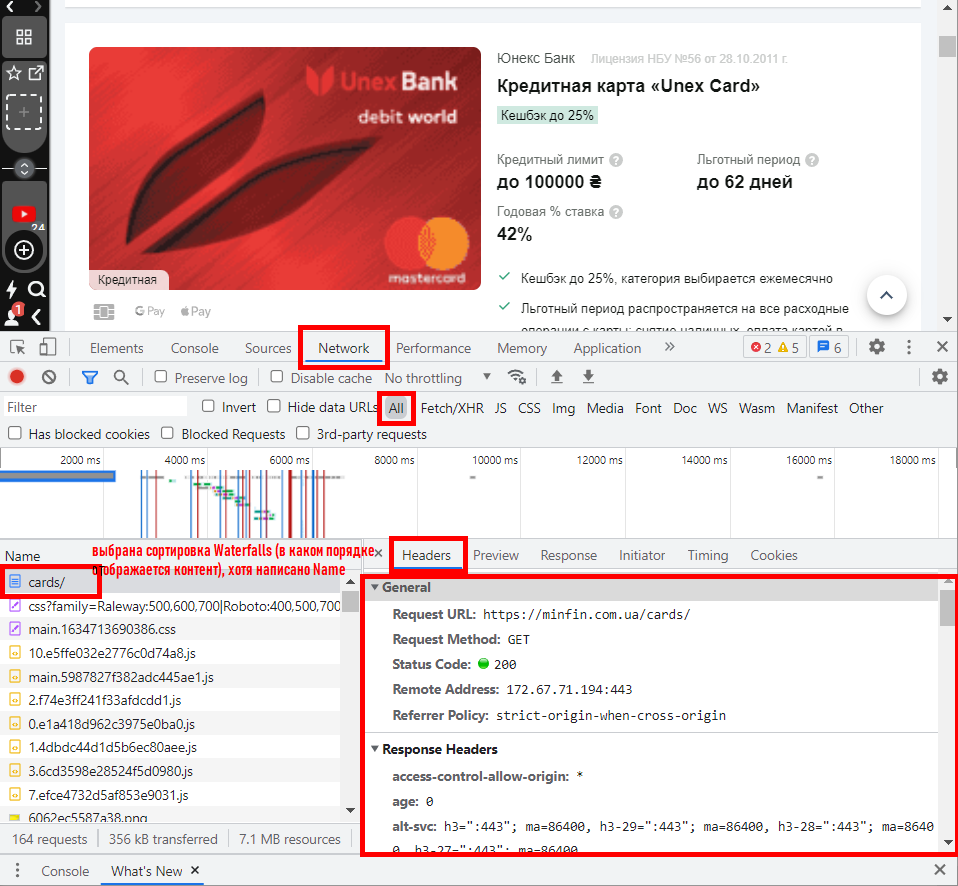

In [10]:
HEADERS = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36'
}
req = requests.get(URL, headers=HEADERS) # сохранили в переменную ответ сервера
if req.ok:
    print("Статус код ответа сервера меньше 400 (нет ошибок ни со стороны) клиента, "
          "ни со стороны сервера, продолжаем парсинг")

Статус код ответа сервера меньше 400 (нет ошибок ни со стороны) клиента, ни со стороны сервера, продолжаем парсинг


Далее исследуем сайт на предмет того, что нужно парсить. Как видим, они применяют обфусцирование стилей (абракадабра в значениях id и class), чтобы защититься от парсеров. Можно смириться с тем, что название нечитаемое, главное, чтобы для этого селектора был единый стиль.

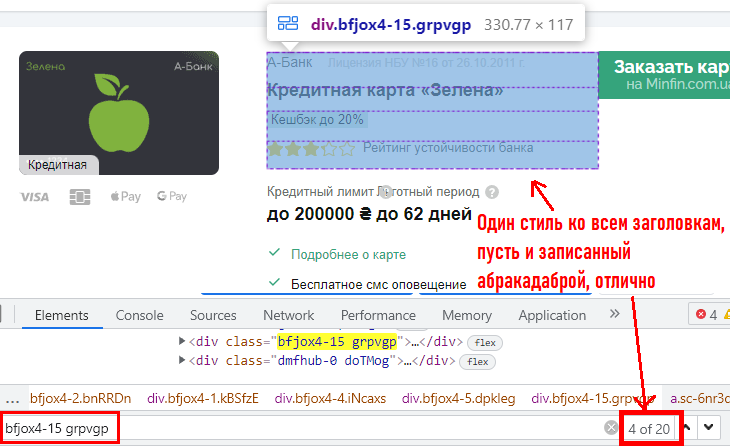

Теперь попробуем спарсить пару заголовков, чтобы проверить, есть ли динамическое изменение имен классов и кода, без изменения вида (дополнительная защита от парсинга)

Далее проверим, подгружает ли сайт контент динамически (AJAX) или сразу выдате 

In [16]:
soup = BeautifulSoup(req.text, 'html.parser')
main_divs_list = soup.find_all('div', class_="bfjox4-1 kBSfzE")
print(len(main_divs_list))

20


Будем итерироваться по этим div-ам, и уже из них извлекать всё нужное
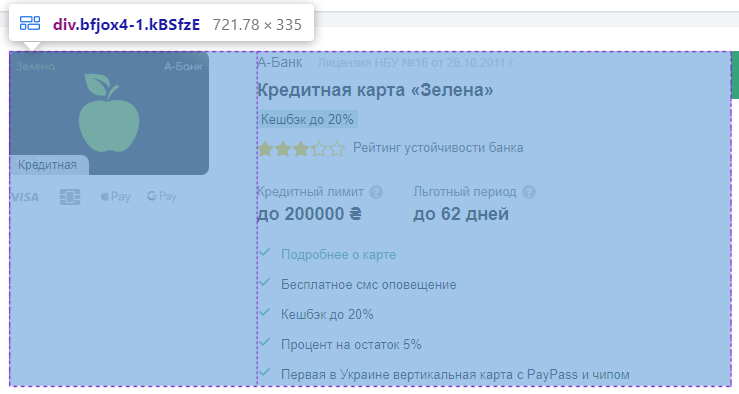
Чтобы извлечь текст, нужно найти все заголовки с классом *sc-6nr3q5-0 iyqRre* и извлечь оттуда текст с помощью метода `.get_text()`
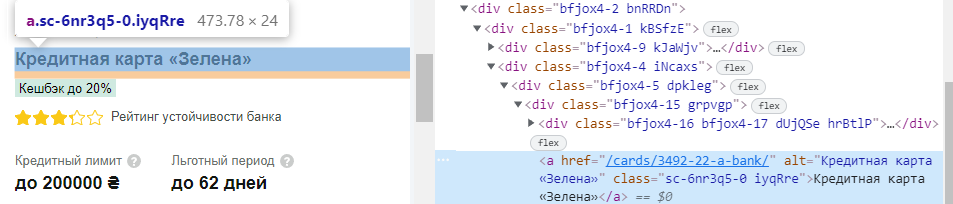

In [19]:
titles = [card.find('a', class_="sc-6nr3q5-0 iyqRre").get_text() for card in main_divs_list]
print(titles)

['Дебетовая карта «Райфкарта»', 'Кредитная карта «Unex Card»', 'Кредитная карта «Monobank»', 'Кредитная карта «Зелена»', 'Кредитная карта «Card Blanche Blue»', 'Кредитная карта «Сaméléon»', 'Кредитная карта «Эко-кредитка»', 'Кредитная карта «Freecard gold»', 'Кредитная карта «Коко Кард»', 'Кредитная карта «ВсеМожу»', 'Кредитная карта «Большая пятерка»', 'Кредитная карта «Benefit New»', 'Кредитная карта «Платинум Премиум +»', 'Кредитная карта «Универсальная»', 'Дебетовая карта «Сберегательная карта»', 'Дебетовая карта «VIP World»', 'Дебетовая карта «Classic»', 'Дебетовая карта «Универсальная»', 'Дебетовая карта «Ощадна»', 'Пакет услуг «Личный Premium»']


По тому же принципу можем получить ссылки, изображения, имя банка и т.п. Чтобы сохранить всю эту информацию в csv, лучше сделать вот как: